In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte, filters, feature, segmentation, img_as_float

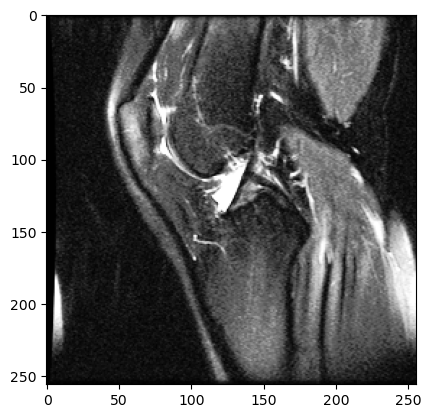

In [3]:
# List of file paths to the .npy files
file_path = "C:\\Users\\heath\\OneDrive - University of Ottawa\\Courses\\BIOM5202\\MRNet-v1.0\\MRNet-v1.0\\train\\sagittal\\0099.npy"
img = np.load(file_path)
img_slice = img[9]

plt.imshow(img_slice, cmap="Greys_r");

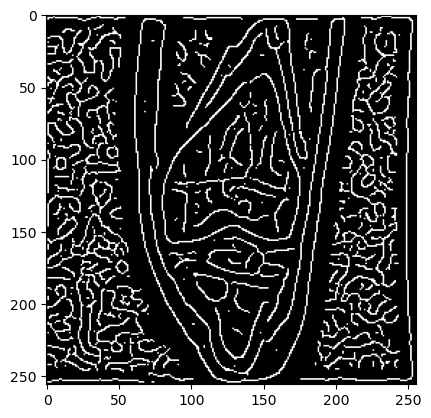

In [10]:
# List of file paths to the .npy files
file_path = "C:\\Users\\heath\projects\\uOttawa\\classes\\mrnet-output\\run_20231130_152716\\train\\coronal\\0099.npy"
img = np.load(file_path)
img_slice = img[9]

plt.imshow(img_slice, cmap="Greys_r");

uint8


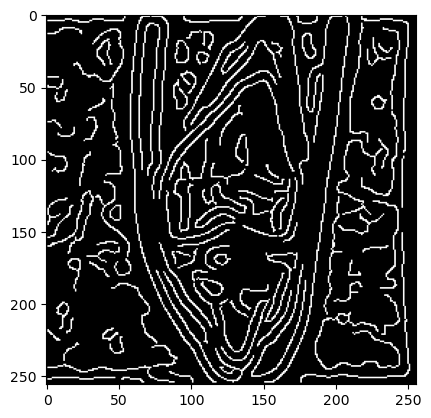

In [14]:
def canny_edge(img):
    edge_canny = feature.canny(img.astype('float32'), sigma=3)
    edge_canny = edge_canny.astype(np.uint8) * 255
    return edge_canny

canny = canny_edge(img_slice)

print(canny.dtype)
plt.imshow(canny, cmap="Greys_r")

TypeError: Invalid shape (2, 256, 256) for image data

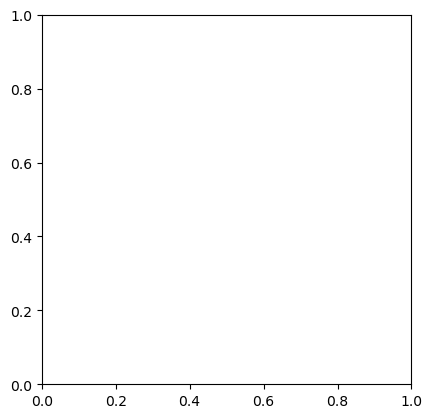

In [4]:
def gabor_filter(img, frequency=0.1, theta=0, sigma=1):
    img = img_as_ubyte(img)
    gabor_filter = filters.gabor(img, frequency=frequency, theta=theta, sigma_x=sigma, sigma_y=sigma)
    return gabor_filter

gabor_response = gabor_filter(img_slice)
plt.imshow(np.abs(gabor_response), cmap="Greys_r")

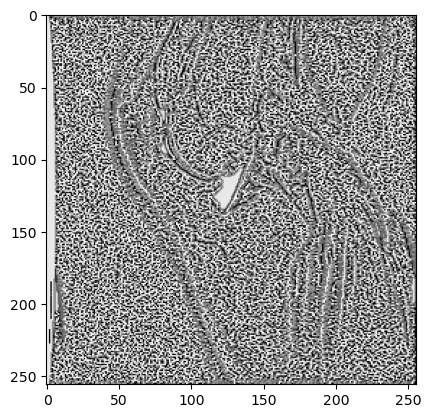

In [ ]:
def apply_lbp(img, radius=1, n_points=5):
    lbp = feature.local_binary_pattern(img, P=n_points, R=radius, method='uniform')
    return lbp

lbp = apply_lbp(img_slice)
plt.imshow(lbp, cmap="Greys_r")

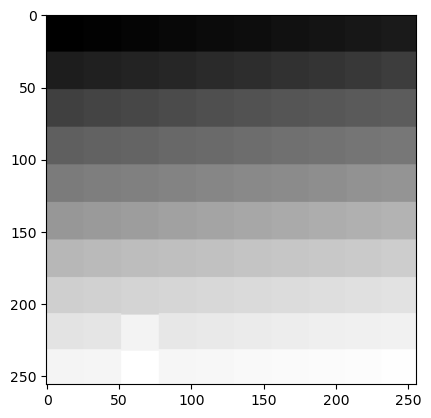

In [ ]:
def superpixel_segmentation(img, n_segments=100):
    img = img_as_float(img)
    segments = segmentation.slic(img, n_segments=n_segments, 
                                 compactness=40.0, sigma=3.0, channel_axis=None)
    return segments

superpixel = superpixel_segmentation(img_slice)
plt.imshow(superpixel, cmap="Greys_r")

In [7]:
def extract_glcm_features(img, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    img = img_as_ubyte(img) # Convert to 8-bit for GLCM
    glcm = feature.graycomatrix(img, distances=distances, angles=angles, symmetric=True, normed=True)
    return glcm

def calculate_contrast(glcm):
    # Calculate contrast from the GLCM
    contrast = feature.graycoprops(glcm, 'contrast')
    return contrast

glcm = extract_glcm_features(img_slice)
contrast = calculate_contrast(glcm)
print(contrast)
print(glcm.shape)

[[355.13267463 467.19094195 253.29770221 514.20890427]]
(256, 256, 1, 4)
